In [97]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [98]:
# 1a)
data = np.load("mnistspezial1.npz")
X = data.f.X
T = data.f.T

In [99]:
#1b)
X.shape

(3000, 28, 28)

In [100]:
#1b)
T.shape

(3000,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


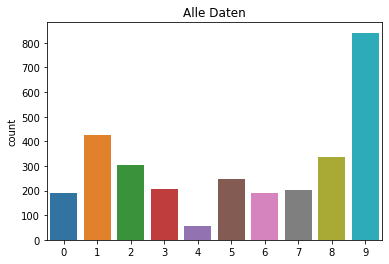

In [101]:
#1c)
plt.title("Alle Daten")
sns.countplot(T)

In [102]:
#1d)
values, counts = np.unique(T, return_counts=True)

In [103]:
values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [104]:
counts

array([191, 426, 305, 205,  55, 248, 191, 203, 335, 841])

In [105]:
#1e)
T = np.where(T != 9, 0, 1)
np.unique(T)

array([0, 1])

In [106]:
values, counts = np.unique(T, return_counts=True)
counts

array([2159,  841])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


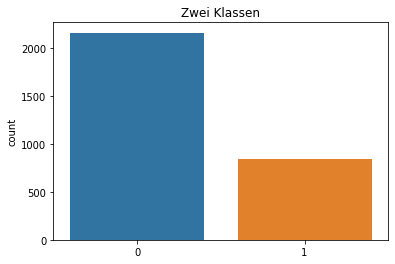

In [107]:
#1f)
plt.title("Zwei Klassen")
sns.countplot(T)

In [108]:
#1g)
N_gesamt = T.shape[0]
print(N_gesamt)

3000


In [109]:
n_train = math.floor(N_gesamt*0.63)
print(n_train)

1890


In [110]:
n_val = math.floor(N_gesamt*0.17)
print(n_val)

510


In [111]:
n_test = math.floor(N_gesamt*0.20)
print(n_test)

600


In [112]:
#1h)
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [113]:
#1i)
model = Sequential()
model.add(Flatten())
model.add(Dense(1,input_shape=(784,), activation='sigmoid'))

model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=["accuracy"])

#model.save_weights('modelinit.h5')
#model.load_weights('modelinit.h5')

hist = model.fit(X[:n_train], T[:n_train],epochs=10,validation_data=(X[n_train:n_train + n_val], T[n_train:n_train + n_val]))

Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: 22.1374 - accuracy: 0.9590 - val_loss: 2687.5605 - val_accuracy: 0.0000e+00
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 7.6085 - accuracy: 0.9932 - val_loss: 1796.2653 - val_accuracy: 0.0000e+00
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 2.5591 - accuracy: 0.9960 - val_loss: 687.4319 - val_accuracy: 0.1686
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 2.7148 - accuracy: 0.9946 - val_loss: 961.7004 - val_accuracy: 0.1020
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 2.2804 - accuracy: 0.9911 - val_loss: 260.3410 - val_accuracy: 0.6863
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 2.8194 - accuracy: 0.9916 - val_loss: 1967.9182 - val_accuracy: 0.0020
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 1.4134 - accuracy: 0.9977 - val_loss: 630.7509 - val_accuracy: 0

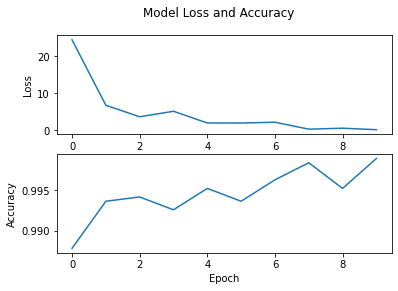

In [114]:
#1j)
losses = hist.history['loss']
accs = hist.history['accuracy']

# Plot history of loss and accuracy
fig, axs = plt.subplots(2)
fig.suptitle('Model Loss and Accuracy')
axs[0].plot(losses)
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[1].plot(accs)
axs[1].set(xlabel='Epoch', ylabel='Accuracy')
plt.show()


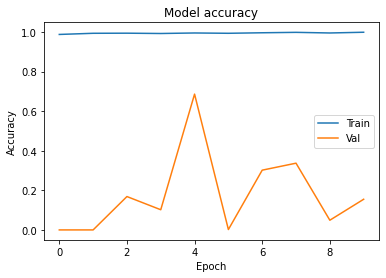

In [115]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

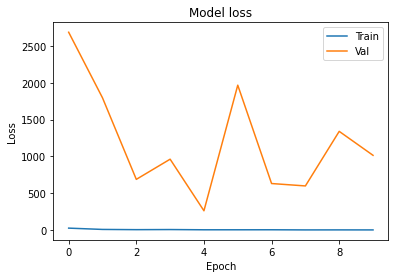

In [116]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
# Make it pretty
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [117]:
#1k)
preds10 = model.predict(X[n_train-10:n_train])
test_acc = model.evaluate(X[n_train-10:n_train], T[n_train-10:n_train], verbose=0)[1]
preds = model.predict(X[:n_train])
preds_val = model.predict(X[n_train:n_train+n_val])
train_acc = model.evaluate(X[:n_train], T[:n_train], verbose=0)[1]
preds_test = model.predict(X[n_train+n_val:])
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [118]:
#1l)
from sklearn.metrics import confusion_matrix
preds = (preds > 0.5).astype(int)
preds_val = (preds_val > 0.5).astype(int)
preds_test = (preds_test > 0.5).astype(int)

In [119]:
confusion_matrix(T[:n_train], preds)

array([[1883,    0],
       [   0,    7]])

In [120]:
confusion_matrix(T[n_train:n_train+n_val], preds_val)

array([[  0,   0],
       [431,  79]])

In [123]:
confusion_matrix(T[n_train+n_val:], preds_test)

array([[274,   2],
       [270,  54]])

Text(0.5, 1.0, 'Sortierung von T')

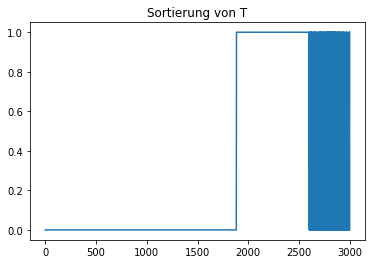

In [122]:
plt.plot(T)
plt.title("Sortierung von T")

431 -> False Negative  
79 -> True Positive  
Die Daten (n_val) besitzen nur die Klasse 1 ( T == 9 )  
-> Daten sind möglicherweise aufsteigend sortiert  


In [129]:
#1m)
values, counts = np.unique(T[:n_train], return_counts=True)
no_info_rate = counts.max()/n_train
print(no_info_rate)

0.9962962962962963


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


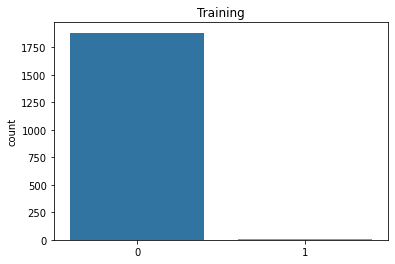

In [130]:
#1n)
plt.title("Training")
sns.countplot(T[:n_train])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


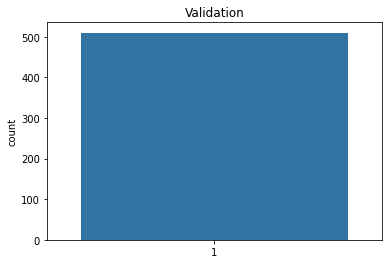

In [131]:
plt.title("Validation")
sns.countplot(T[n_train:n_train+n_val])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


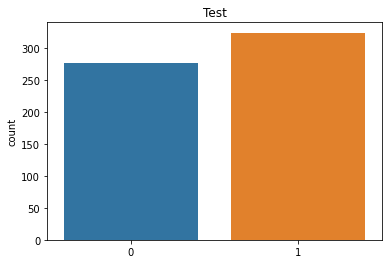

In [132]:
plt.title("Test")
sns.countplot(T[n_train+n_val:])

#1o) Das Model hat im Training fast nur mit Daten der Klasse 0 (T != 9) trainiert und wurde nur mit Daten mit der Klasse 1 (T == 9) validiert. 

In [143]:
#1p) 
from sklearn.model_selection import train_test_split

X_tmp, X_test, y_tmp, y_test = train_test_split(X, T, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.2125,random_state=42)

print("Train: ", len(X_train))
print("Val: ", len(X_val))
print("Test: ", len(X_test))

Train:  1890
Val:  510
Test:  600


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


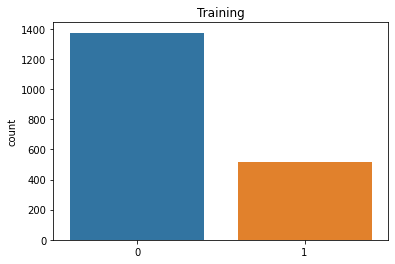

In [144]:
plt.title("Training")
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


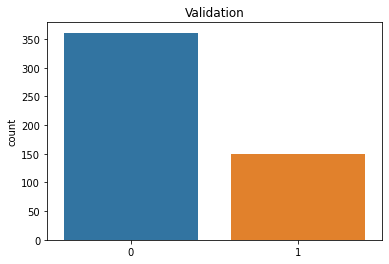

In [145]:
plt.title("Validation")
sns.countplot(y_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


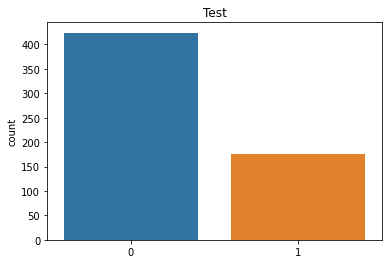

In [146]:
plt.title("Test")
sns.countplot(y_test)

In [147]:
#1q)
model = Sequential()
model.add(Flatten())
model.add(Dense(1,input_shape=(784,), activation='sigmoid'))

model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=["accuracy"])

#model.save_weights('modelinit.h5')
#model.load_weights('modelinit.h5')

hist = model.fit(X_train, y_train,epochs=10,validation_data=(X_val, y_val))

Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: 677.9837 - accuracy: 0.7638 - val_loss: 71.4953 - val_accuracy: 0.9412
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 131.2156 - accuracy: 0.9055 - val_loss: 76.6116 - val_accuracy: 0.9431
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 92.6109 - accuracy: 0.9372 - val_loss: 84.4286 - val_accuracy: 0.9392
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 74.2976 - accuracy: 0.9389 - val_loss: 946.9450 - val_accuracy: 0.7118
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 145.6173 - accuracy: 0.9102 - val_loss: 106.3789 - val_accuracy: 0.9098
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 85.6723 - accuracy: 0.9390 - val_loss: 2953.0999 - val_accuracy: 0.7078
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 333.6548 - accuracy: 0.8940 - val_loss: 71.7023 - val_accuracy: 0.943

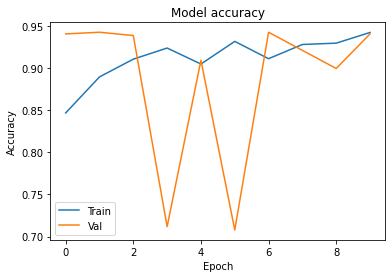

In [148]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

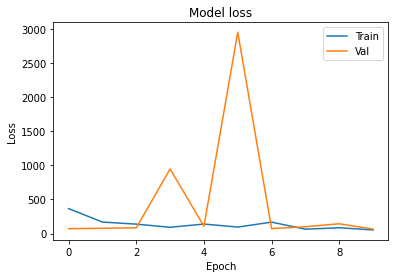

In [149]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
# Make it pretty
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [150]:
preds = model.predict(X_train)
preds = (preds > 0.5).astype(int)
confusion_matrix(y_train, preds)

array([[1338,   36],
       [  41,  475]])

In [152]:
from sklearn.metrics import classification_report
target_names = ["0", "1"]
print(classification_report(y_train, preds, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1374
           1       0.93      0.92      0.93       516

    accuracy                           0.96      1890
   macro avg       0.95      0.95      0.95      1890
weighted avg       0.96      0.96      0.96      1890



#1r) Es kann eine ROC Kurve erstellt werden, weil:  
-> es gibt False Positives  
-> es gibt True Positives  
-> es existieren nur 2 Klassen  
-> es handelt sich um einen binären Klassifizierer

In [158]:
from sklearn import metrics
preds_test = model.predict(X_test)
preds_test = (preds_test > 0.5).astype(int)
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_test, pos_label=1)

Text(0.5, 1.0, 'ROC')

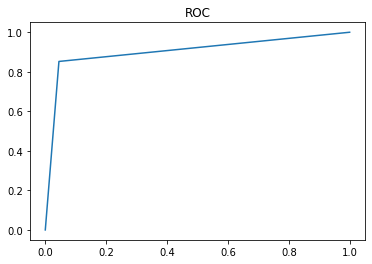

In [160]:
plt.plot(fpr, tpr)
plt.title("ROC")

In [161]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds_test)

0.9037307032590052

#1s) Der Brier Score mit dem aktuellen Stand der Predicion nicht verwendet werden, weil der Brier Score die vorhergesagten Wahrscheinlichkeiten benötigt. Momentan sind die Predictions als die entsprechende Klasse vorhanden. Man könnte den Brier Score verwenden, wenn wir die Ausgabe der Prediction anpassen würden. 